### Baseline Logistic Regression Modeling for The Vehicle Insurance Claim Fraud Detection System

Author: Hannah Lal
<br>Date: January 2024
<br>Email: itshannahlal@gmail.com


#### Introduction

Insurance fraud is a prevalent and costly challenge for both policyholders and insurance companies. Fraudulent activities may encompass "false claims", "misrepresentation of information", or "organized fraud schemes". Detecting and preventing these activities is crucial for minimizing financial losses for issuers as well as safeguarding policyholders. Given its significant impact, insurance fraud detection has emerged as a prominent  research area in data science and machine learning. This capstone project aims to concentrate on identifying and preventing fraudulent or misleading insurance claims using the dataset available at Kaggle. The objective is to develop algorithms and models that can automatically detect suspicious activities through historical data analysis. 


Vehicle Insurance Fraud Detection is a vital component within the realm of insurance fraud prevention. This critical undertaking is centered on the identification and prevention of unauthorized or fraudulent claims related to vehicle insurance, representing a significant financial concern for all stakeholders involved. The challenge at hand is to devise methods that are both efficient and accurate in detecting these deceptive activities. Our focus in this capstone project is to address this challenge head-on, utilizing historical data accessible on the Kaggle platform. By immersing ourselves in the nuances of vehicle insurance fraud, we aspire to develop innovative solutions that enhance the resilience of insurance systems against the evolving landscape of fraudulent activities in the automotive insurance domain.


Stakeholders involved with issues related to Vehicle Insurance Fraud Detection are policyholders, insurance companies, and financial institutions. Policyholders stand to gain heightened security and protection against fraudulent claims, fortifying their confidence in the insurance process. Concurrently, insurance companies and financial institutions reap the benefits of diminished financial losses resulting from fraudulent activities, thereby bolstering customer trust and elevating their standing and reputation within the industry. This collaborative effort aims to create a more secure and trustworthy landscape in the realm of vehicle insurance, benefitting all entities involved in the insurance ecosystem.


For our baseline modeling we will be using the *logistic regression* and *decision tree* models having the FraudFound_P column as our target variable to predict its values given all the other columns as its independent variables. 

For model enhancement purposes, since the dataset is highly imbalanced, we will first apply *SMOTE* method to resample the data, then we will fit this resampled data into our baseline models and finally we will be using hyperparameter optimization and ensemble methods like *xgboost*, *gradient boosting* and *bagging/random forests* to further improve the performance of our models. For our evaluation metrics we will be considering different metrics such as *precision*, *recall*, and *f1 score* and we will be plotting *confusion matrix* and *ROC curves* and displaying the *classification reports*.

Finally, we will compare different trained models with each other and specifically analyse important features for each model and draw some conclusions.


### Data Dictionary
The clean and preprocessed vehicle insurance fraud dataset (fraud_clean.csv) includes but is not limited to the following fields:

<!-- To be updated -->

| Features | Description |
|:------------|:------------|
| Make_1                  | Brand of the vehicle (initillay mapped as -> 'Pontiac', 'Toyota', 'Honda') |
| Make_2                  | Brand of the vehicle (initillay mapped as -> 'Chevrolet', 'Mazda') |
| Make_3                  | Brand of the vehicle (initillay mapped as -> 'VW', 'Ford', 'Accura') |
| AccidentArea            | where the accident happened (initillay mapped as -> 'Urban', 'Rural') |
| Sex                     | Gender of the vehicle owner (initillay mapped as -> Male/Female) |
| Married                 | Marital status of the vehicle owner is Married |
| Single                  | Marital status of the vehicle owner is Single |
| Age                     | Age of the vehicle owner |
| Fault                   | Fault of the accident: initillay mapped as -><br>Policy Holder: The fault of the accident is on Policy holder<br>Third Party: The fault of the accident is on the third party |
| PolicyType_1            | Indicates the type of coverage for the policy, specifying whether it covers 'Sedan - Collision', 'Sedan - Liability', 'Sedan - All Perils' |
| PolicyType_2            | Indicates the type of coverage for the policy, specifying whether it covers 'Sport - Collision', 'Utility - All Perils' |
| VehicleCategory_Sport   | Describes the category of the insured vehicle is Sport car |
| VehicleCategory_Sedan   | Describes the category of the insured vehicle is Sedan car |
| VehiclePrice            | The price range of the insured car |
| RepNumber               | Represents the identifier or code for the insurance representative or agent associated with the policy |
| Deductible              | Refers to the amount that the policyholder has to pay out of pocket before the insurance coverage takes effect |
| DriverRating            | Indicates the rating or risk associated with the driver insured under the policy (1 to 4) |
| Days_Policy_Accident    | The number of days since the last accident covered by the policy |
| Days_Policy_Claim       | The number of days since the last insurance claim was filed under the policy |
| PastNumberOfClaims      | Represents the total number of claims filed by the policyholder in the past |
| AgeOfVehicle            | Age of the vehicle involved in the accident |
| PoliceReportFiled       | Indicates whether a police report was filed in case of an accident or claim (Yes/No) |
| WitnessPresent          | Indicates whether any witnesses were present when the accident happened (Yes/No) |
| AgentType               | Describes the type or category of the insurance agent associated with the policy (External/Internal) |
| NumberOfSuppliments     | Indicates the number of additional supplements or endorsements to the policy |
| AddressChange_Claim     | Indicates whether there has been a change in the policyholder's address following a claim |
| NumberOfCars            | Indicates the number of cars involved in the accident |
| Year_1994               | The year the accident happened is (1994) |
| Year_1995               | The year the accident happened is (1995) |
| Base_Policy_Liability   | Describes the foundational or base insurance policy being 'Liability' |
| Base_Policy_Collision   | Describes the foundational or base insurance policy being 'Collision' |

| Target Variable | Description |
|:------------|:------------|
| FraudFound_P   | Probability of a fraud being found |

### Table of contents
* Section 1: Data Representation
* Section 2: Logistic Regression Enhanced Modeling
* Section 3: Decision Tree Enhanced Modeling
* Section 4: Conclusion and Insights

### Section 1: Data Representation

In [3]:
# importing required libraries:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

import statsmodels.api as sm

from sklearn.model_selection import train_test_split

from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.neural_network import MLPRegressor
from sklearn.metrics import r2_score

from sklearn.tree import DecisionTreeRegressor

from sklearn.model_selection import GridSearchCV

%matplotlib inline

# filter warnings
import warnings
warnings.filterwarnings('ignore')

In [4]:
# read vehicle insurance fraud data:
df=pd.read_csv('C:/Users/itsha/Downloads/archive/fraud_clean.csv')

In [5]:
# display a sample 10 rows of data:
df.sample(10)

,AccidentArea,Sex,Age,Fault,FraudFound_P,RepNumber,Deductible,DriverRating,PoliceReportFiled,WitnessPresent,...,Make_2,Make_3,Married,Single,Year_1994,Year_1995,Number_Cars,Address_Change_Claim,DaysPolicy_Claim,DaysPolicy_Accident
3950,1,1,47,1,0,2,400,3,0,0,...,0,0,0,1,1,0,0,0,3,3
2932,1,1,30,0,0,13,400,4,0,0,...,0,0,0,0,1,0,0,0,3,3
10247,1,1,33,1,0,13,400,3,0,0,...,0,0,0,0,0,1,1,4,3,3
6651,1,1,35,0,0,8,400,4,0,0,...,1,0,0,1,0,1,0,0,3,3
13306,1,1,46,1,0,13,400,2,0,0,...,0,0,0,1,0,0,0,0,3,3
280,1,1,0,0,0,11,400,4,0,0,...,0,0,0,0,1,0,0,0,3,3
3204,1,0,22,0,0,7,400,2,0,0,...,0,0,0,0,1,0,0,0,3,3
6907,1,1,21,1,0,11,400,2,0,0,...,0,0,0,0,0,1,0,0,3,3
1309,1,1,64,1,0,4,400,3,0,0,...,1,0,0,1,1,0,0,0,3,3
3278,1,0,54,1,0,15,400,1,0,0,...,1,0,0,1,1,0,0,0,3,3


Let's see how many rows and columns there are in the data set: 

In [6]:
df.shape

(15419, 32)

First, we should separate the data from our target variable (labels) and create the X and y matrices:

In [7]:
X = df.drop(['FraudFound_P'], axis = 1) # separate FraudFound_P column from all others
y = df['FraudFound_P'] # is this a fraudulent claim?

### Section 2: Logistic Regression Enhanced Modeling 

##### Logistic Regression with StandardScaler and class_weight='balanced':

We'll first split the data into train and test. We'll choose 80-20 proportions. The stratify parameter in the train_test_split function is used to ensure that the distribution of the target variable is similar in both the training and testing datasets. This is particularly useful when dealing with imbalanced datasets, where one class may be significantly underrepresented compared to the other which is the case with our dataset:

In [8]:
# 80%-20% train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

Then, we will scale the data using the StandardScaler from the sklearn library. Then we will fit the logistic regression model on the scaled train and test data. Then, we will calculate the scores, percision and recall and we will also be displaying the confusion matrix as well as ROC AUC scores. 

Accuracy for train: 0.6115119578435346
Accuracy for test: 0.6092736705577172


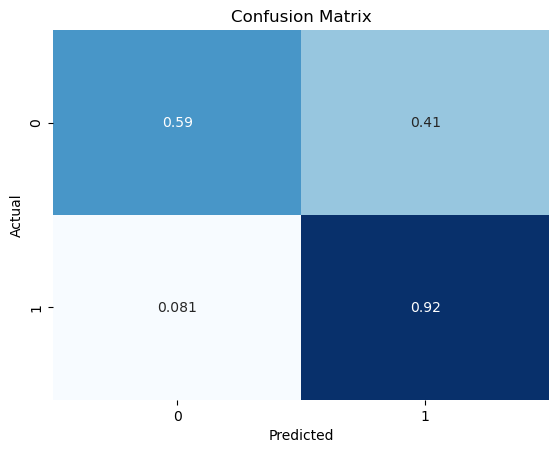

Precision: 0.125
Recall: 0.918918918918919
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.59      0.74      2899
           1       0.12      0.92      0.22       185

    accuracy                           0.61      3084
   macro avg       0.56      0.75      0.48      3084
weighted avg       0.94      0.61      0.71      3084

ROC AUC Score: 0.8059666427379432


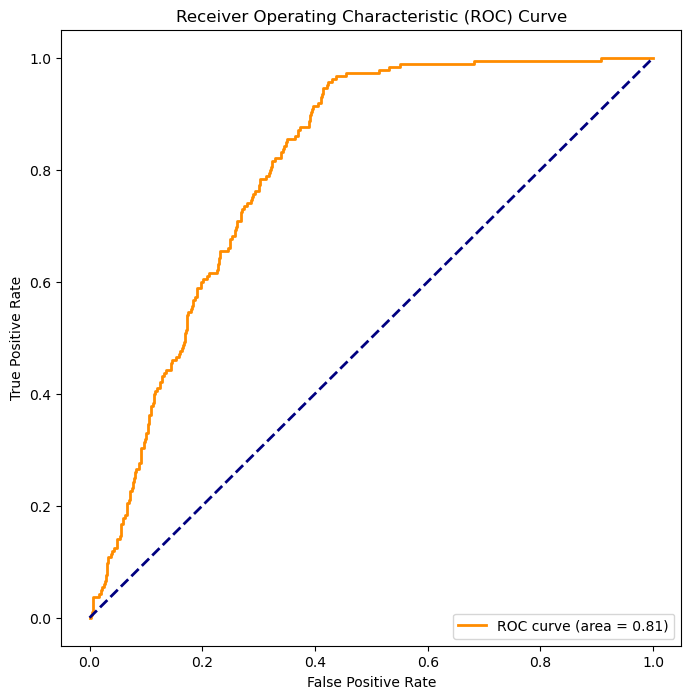

ROC AUC Score: 0.8059666427379432


In [11]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve, auc, precision_score, recall_score

# Standardize the features (scaling)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


# logistic regression:
logreg = LogisticRegression(max_iter=1000, random_state=42 , class_weight='balanced') 
log = logreg.fit(X_train_scaled, y_train)

# Calculate accuracy using .score() on transformed data
accuracy_train = log.score(X_train_scaled, y_train)
accuracy_test = log.score(X_test_scaled, y_test)

print(f"Accuracy for train: {accuracy_train}")
print(f"Accuracy for test: {accuracy_test}")

y_pred = log.predict(X_test_scaled)
y_prob = log.predict_proba(X_test_scaled)[:, 1]

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
cm_normalized = conf_matrix.astype('float') / conf_matrix.sum(axis=1)[:, np.newaxis]
sns.heatmap(cm_normalized, annot=True, cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


# Precision and Recall
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print("Precision:", precision)
print("Recall:", recall)

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

# Classification Report
class_report = classification_report(y_test, y_pred)
print("Classification Report:\n", class_report)
print("ROC AUC Score:", roc_auc)

# Plot ROC Curve
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# ROC AUC Score
print("ROC AUC Score:", roc_auc)

The accuracy for both train and test is not very high, that means we're not overfitting here but the accuracy is also not very high. 

Precision and recall are important metrics, especially in imbalanced datasets, to understand how well the model is performing in terms of correctly identifying positive cases (precision) and capturing all positive cases (recall).

##### Insights for Classification Report:

##### Class 0: 
* Percision: 0.99: Meaning When the model predicts class 0, it is correct 99% of the time
* Recall: 0.59: Meaning the model captures 59% of the actual instances of class 0
* F1-Score: 0.74

##### Class 1: 
* Percision: 0.12: Meaning when the model predicts class 1, it is correct only 12% of the time
* Recall: 0.92: Meaning the model is effective at capturing 92% of the actual instances of class 1
* F1-Score: 0.22

##### Overall: 
* Accuracy: 0.61: The overall accuracy of the model is 61%
* Macro avg (precision, recall, F1-score): 0.56, 0.75, 0.48
* Weighted avg (precision, recall, F1-score): 0.94, 0.61, 0.71

##### Precision and Recall: 
* Percision for class 1: When the model predicts fraud (class 1), it is correct only 12.5% of the time
* Recall for class 1: The model captures 91.9% of the actual instances of fraud

##### ROC AUC Score: 
* ROC AUC (Receiver Operating Characteristic Area Under the Curve) is a measure of the model's ability to distinguish between positive and negative classes. A score of 0.806 indicates relatively good performance. The closer the score is to 1, the better the model is at distinguishing between the two classes.
* What this means is that, The model shows a good ability to discriminate between the two classes as indicated by the ROC AUC score. 
* The precision for non-fraud (class 0) remains high, suggesting that when the model predicts non-fraud, it is usually correct. 
* The recall for fraud (class 1) is high, indicating that the model is effective at capturing innstances of fraud.
* The F1-score provides a balance between precision and recall.
* One recommendation to make the model better, is to adjust the model threshold and continue monitoring and fine-tuning the model based on our specific requirements for this application.
* We can also consider exploring other models or techniques to further improve performance, especifically due to the fact that not being able to detect fraudulent claims is a very costly miss on our side.

##### Logistic Regression with StandardScaler, SMOTE and class_weight='balanced':

Now, let's use the SMOTE method to address the imbalance of data:

Accuracy for train: 0.6248885285772193
Accuracy for test: 0.6235408560311284


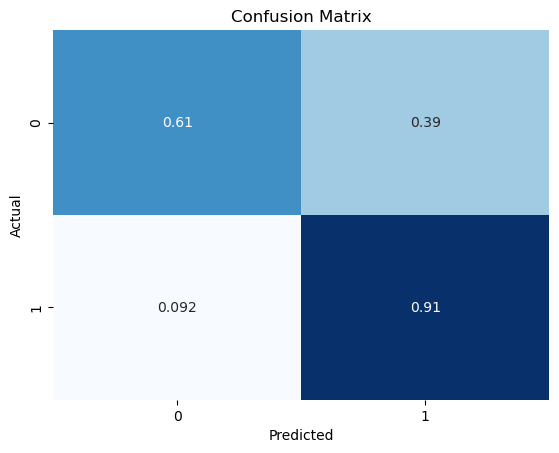

Classification Report LogReg with Smote:
               precision    recall  f1-score   support

           0       0.99      0.61      0.75      2899
           1       0.13      0.91      0.22       185

    accuracy                           0.62      3084
   macro avg       0.56      0.76      0.49      3084
weighted avg       0.94      0.62      0.72      3084

ROC AUC Score: 0.8048907824692578
Precision: 0.12804878048780488
Recall: 0.9081081081081082


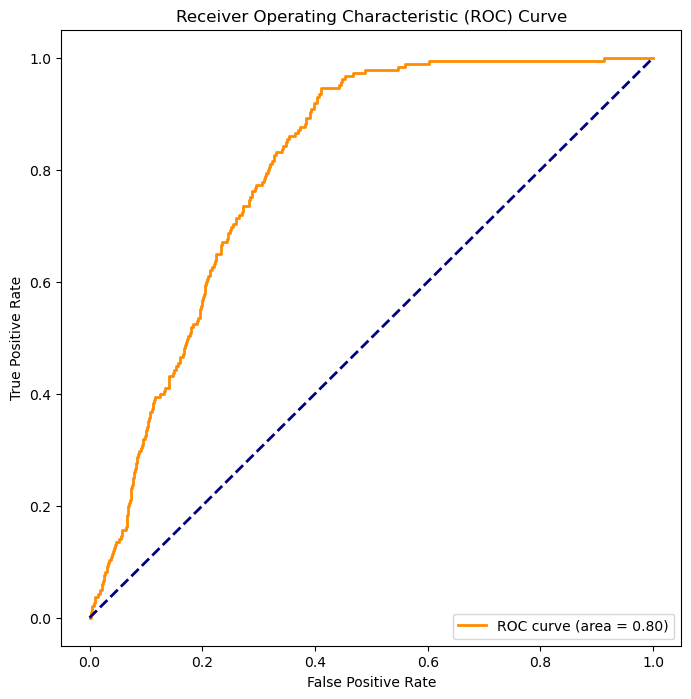

ROC AUC Score: 0.8048907824692578


In [12]:
from imblearn.over_sampling import SMOTE

# Use 'SMOTE" on the training set (X_train_scaled and y_train) to oversample the minority class and balance the class distribution
# Apply SMOTE to balance the class distribution
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_scaled, y_train)

# Create a Logistic Regression model
logreg_smote = LogisticRegression(max_iter=1000, random_state=42, class_weight='balanced')
smote = logreg_smote.fit(X_train_resampled, y_train_resampled)

# Calculate accuracy using .score() on transformed data
accuracy_train_smote = smote.score(X_train_scaled, y_train)
accuracy_test_smote = smote.score(X_test_scaled, y_test)

print(f"Accuracy for train: {accuracy_train_smote}")
print(f"Accuracy for test: {accuracy_test_smote}")

# Evaluate the model
y_pred_smote = smote.predict(X_test_scaled)
y_prob_smote = smote.predict_proba(X_test_scaled)[:, 1]

# Confusion Matrix
conf_matrix_smote = confusion_matrix(y_test, y_pred_smote)
cm_normalized_smote = conf_matrix_smote.astype('float') / conf_matrix_smote.sum(axis=1)[:, np.newaxis]
sns.heatmap(cm_normalized_smote, annot=True, cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Print the classification report and ROC AUC score
class_report_smote = classification_report(y_test, y_pred_smote)
roc_auc_smote = roc_auc_score(y_test, smote.predict_proba(X_test_scaled)[:, 1])

print("Classification Report LogReg with Smote:\n", class_report_smote)
print("ROC AUC Score:", roc_auc_smote)

# Precision and Recall
precision_smote = precision_score(y_test, y_pred_smote)
recall_smote = recall_score(y_test, y_pred_smote)

print("Precision:", precision_smote)
print("Recall:", recall_smote)

# ROC Curve
fpr_smote, tpr_smote, thresholds_smote = roc_curve(y_test, y_prob_smote)
roc_auc_smote = auc(fpr_smote, tpr_smote)

# Plot ROC Curve
plt.figure(figsize=(8, 8))
plt.plot(fpr_smote, tpr_smote, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc_smote))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# ROC AUC Score
print("ROC AUC Score:", roc_auc_smote)

As we can see from the results of the two trained models, we can conclude that applying SMOTE and resampling the data, caused us to have better recall measure for class 0, and a little bit worse recall for class 1. Becuase, in this project, the recall measure of the class 1 is the most important measure, then applying smote before applying the logreg model is not desirable as it decreases the value of recall for class 1 by 1%. That's why, we will ocntinue with the original logreg model that we trained firstmost.

#### Fine-Tuning the Logistic Regression Model with GridSearch - Hyperparameter Optimization: 

Le'ts make use of GridSearch functionality from the sklearn library. We will be defining 3 hyperparameters for our logistic regression model to tune in. 

In [13]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold

# Define the hyperparameter grid
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],  # Regularization parameter
    'penalty': ['l1', 'l2'],  # Regularization type
    'solver': ['liblinear', 'saga']
}

# Define the cross-validation strategy using the StratifiedKFold 
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Create GridSearchCV
grid_search = GridSearchCV(logreg, param_grid, cv=cv, scoring='recall', n_jobs=-1) #use logreg and not logreg_smote model, since logreg performs better

# Fit the GridSearchCV instance on the training data
grid = grid_search.fit(X_train_scaled, y_train)

# Get the best parameters and best score
print("Best Parameters:", grid.best_params_)

Best Parameters: {'C': 0.01, 'penalty': 'l1', 'solver': 'liblinear'}


Now, let's use the best model found next: 

In [14]:
# Use the best model
best_model = grid.best_estimator_

# Evaluate the best model using cross-validated performance
cv_results = pd.DataFrame(grid.cv_results_)
print("Cross-validated ROC AUC scores:")
print(cv_results[['param_C', 'param_penalty', 'param_solver', 'mean_test_score']])

# Evaluate the best model on the test set
y_pred = best_model.predict(X_test_scaled)
y_prob = best_model.predict_proba(X_test_scaled)[:, 1]

# Classification Report
class_report = classification_report(y_test, y_pred)
print("Classification Report:\n", class_report)

# ROC AUC Score
roc_auc = roc_auc_score(y_test, y_prob)
print("ROC AUC Score:", roc_auc)

Cross-validated ROC AUC scores:
   param_C param_penalty param_solver  mean_test_score
0    0.001            l1    liblinear         0.871199
1    0.001            l1         saga         0.871199
2    0.001            l2    liblinear         0.907832
3    0.001            l2         saga         0.876669
4     0.01            l1    liblinear         0.910535
5     0.01            l1         saga         0.910535
6     0.01            l2    liblinear         0.895643
7     0.01            l2         saga         0.887516
8      0.1            l1    liblinear         0.890228
9      0.1            l1         saga         0.890228
10     0.1            l2    liblinear         0.883453
11     0.1            l2         saga         0.883453
12       1            l1    liblinear         0.883462
13       1            l1         saga         0.883462
14       1            l2    liblinear         0.883462
15       1            l2         saga         0.883462
16      10            l1    libli

#### Feature Importance in the Best-Found Logistic Regression Model Using the GridSearchCV Method: 

Let's take a look at important features in our best found Logistic Regression model: 

<AxesSubplot:ylabel='Feature'>

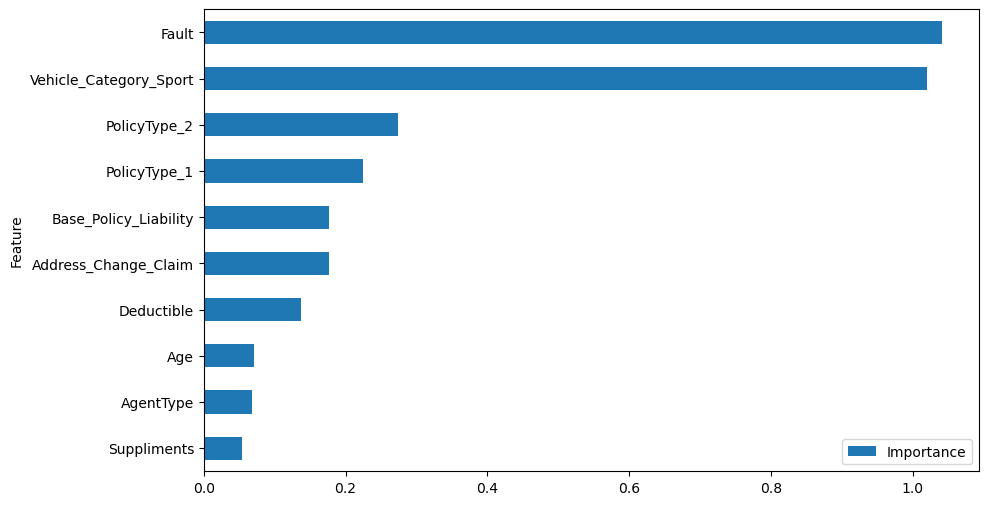

In [15]:
# Get feature importances in logreg model
coefficients = best_model.coef_[0]

feature_importance = pd.DataFrame({'Feature': X.columns, 'Importance': np.abs(coefficients)})
feature_importance = feature_importance.sort_values('Importance', ascending=True).tail(10)
feature_importance.plot(x='Feature', y='Importance', kind='barh', figsize=(10, 6))

We see from the plot above that fault and vehicle_category_sport are the two most indicating features in our logistic regression model. And PolicyType_2 and PolicyType_1 along with Address_Change_Claim and Base_Policy_Liability stand in the second place as contributors to this model. We will next consider applying xgboost method on LogReg model:

#### Feature Importance in Logistic Regression Model Using the XGBoost Method: 

In [16]:
# pip install xgboost

Best Parameters: {'colsample_bytree': 1.0, 'learning_rate': 0.2, 'max_depth': 9, 'n_estimators': 200, 'subsample': 0.9}
Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.99      0.96      2899
           1       0.22      0.05      0.09       185

    accuracy                           0.93      3084
   macro avg       0.58      0.52      0.53      3084
weighted avg       0.90      0.93      0.91      3084



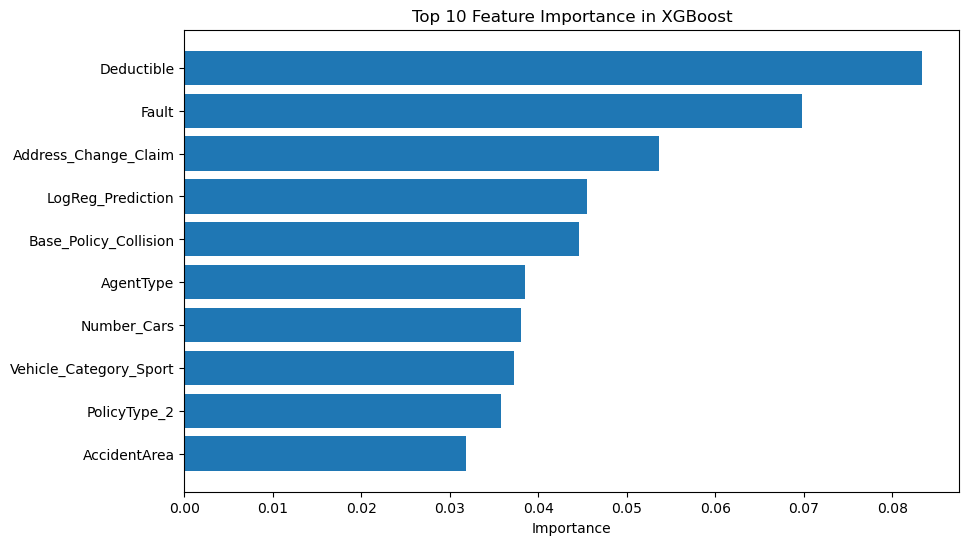

In [17]:
from xgboost import XGBClassifier

# Step 1: Train a logistic regression model
logreg_model = LogisticRegression(random_state=42)
logreg_model.fit(X_train_scaled, y_train)

# Step 2: Use logistic regression predictions as features for XGBoost
logreg_predictions_train = logreg_model.predict_proba(X_train_scaled)[:, 1]
logreg_predictions_test = logreg_model.predict_proba(X_test_scaled)[:, 1]

# Concatenate logistic regression predictions to the original features
X_train_xgb = np.column_stack((X_train_scaled, logreg_predictions_train))
X_test_xgb = np.column_stack((X_test_scaled, logreg_predictions_test))

# Step 3: Apply XGBoost with GridSearchCV
xgb_model = XGBClassifier()

# Define the parameter grid to search
param_grid = {
    'n_estimators': [30, 50, 100, 150, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [5, 7, 9],
    'subsample': [0.7, 0.8, 0.9, 1.0],
    'colsample_bytree': [0.7, 0.8, 0.9, 1.0]
}

# Create the GridSearchCV object
grid_search = GridSearchCV(xgb_model, param_grid, cv=5, scoring='f1', n_jobs=-1)

# Fit the model with grid search using logistic regression predictions as features
grid_search.fit(X_train_xgb, y_train)

# Get the best parameters and best estimator
best_params = grid_search.best_params_
best_estimator = grid_search.best_estimator_

# Step 4: Evaluate the model on the test set
y_pred = best_estimator.predict(X_test_xgb)
print("Best Parameters:", best_params)
print("Classification Report:\n", classification_report(y_test, y_pred))

# Step 5: Plot feature importance
feature_importance = best_estimator.feature_importances_
feature_names = list(X_train.columns) + ['LogReg_Prediction']

# Create a DataFrame with feature names and their importance scores
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importance})

# Sort the DataFrame by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=True)

# Plot the top N important features
top_n = 10  
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'].tail(top_n), feature_importance_df['Importance'].tail(top_n))
plt.xlabel('Importance')
plt.title('Top {} Feature Importance in XGBoost'.format(top_n))
plt.show()

##### Insights: 

* From the following plots and results, we can conclude that training a logistic regression model and applying xgboost method, results in the following most important features contributing to the accuracy, precision and recall measures: Vehicle_Category_Sport, Deductible, Fault, and Base_Policy_Liability. Make_3 and Base_Policy_Collision are also seen as contributing factors, which were not among top 10 in the previous section. Yet since the recall measure for class 1 is still lower than the logreg model, these feature importances informations are not as reliable. The value of recall is awfully low for class 1 but the precision for class 1 is around 10% percent higher. But the most important measure for us is recall, therefore the xgboost method with the current setting has not proved to be helpful. We will need to further look up into this to find place for improvement. 

### Section 3: Decision Tree Enhanced Modeling

Let's train the Decision Tree model on the scaled data using GridSearchCV and getting the best hyperparameters and the best model as well as plotting the confusion matrix and ROC curve and also displaying precision and recall measures: 

Best Hyperparameters:
{'ccp_alpha': 0.0001, 'max_depth': 30, 'min_samples_leaf': 10}
Classification Report for Decision Tree:
               precision    recall  f1-score   support

           0       0.96      0.79      0.86      2899
           1       0.13      0.51      0.21       185

    accuracy                           0.77      3084
   macro avg       0.55      0.65      0.54      3084
weighted avg       0.91      0.77      0.83      3084

ROC AUC Score: 0.6750678239467477
Precision: 0.13231197771587744
Recall: 0.5135135135135135


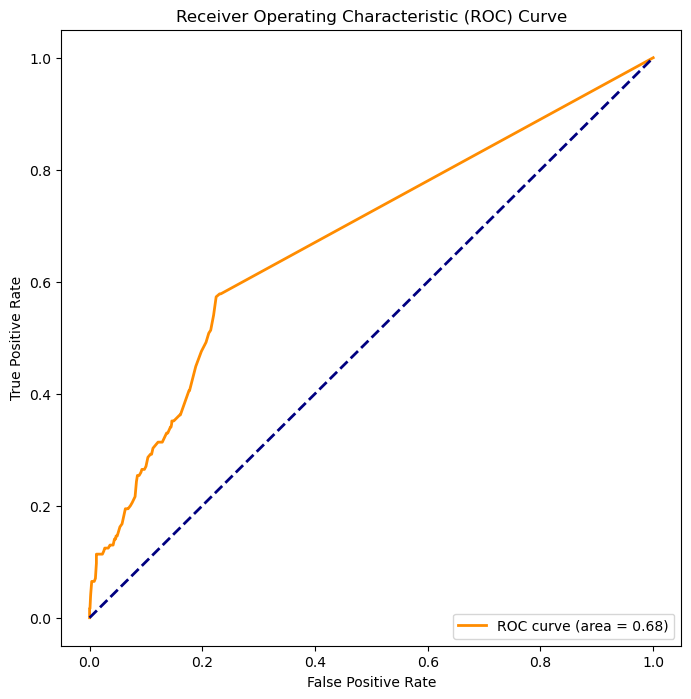

ROC AUC Score: 0.6750678239467477


In [19]:
from sklearn.tree import DecisionTreeClassifier

# Define Hyperparameters: 
param_grid = {
        'max_depth': [5, 10, 20, 30, 40, 50],
        'min_samples_leaf': [10, 20, 25],
        'ccp_alpha': [0.0001, 0.001, 0.01, 0.1]  # for regularization
        }

# Tune Hyperparameters and Create a Decision Tree Model:
grid_search_dt = GridSearchCV(DecisionTreeClassifier(random_state=42, class_weight='balanced'), param_grid, cv=5)
fittedgrid_dt = grid_search_dt.fit(X_train_scaled, y_train)

# Get the Best Model with the Best Hyperparameters:
best_params_dt = fittedgrid_dt.best_params_
best_model_p_dt = fittedgrid_dt.best_estimator_

print("Best Hyperparameters:")
print(best_params_dt)

# Fit the Best Model: 
dt_model = best_model_p_dt.fit(X_train_scaled, y_train)

# Evaluate the Model
y_pred_dt = dt_model.predict(X_test_scaled)
y_prob_dt = dt_model.predict_proba(X_test_scaled)[:, 1]

# Print the Classification Report and ROC AUC Score
class_report_dt = classification_report(y_test, y_pred_dt)
roc_auc_dt = roc_auc_score(y_test, y_prob_dt)

print("Classification Report for Decision Tree:\n", class_report_dt)
print("ROC AUC Score:", roc_auc_dt)

# Precision and Recall
precision_dt = precision_score(y_test, y_pred_dt)
recall_dt = recall_score(y_test, y_pred_dt)

print("Precision:", precision_dt)
print("Recall:", recall_dt)

# ROC Curve
fpr_dt, tpr_dt, thresholds_dt = roc_curve(y_test, y_prob_dt)
roc_auc_dt = auc(fpr_dt, tpr_dt)

# Plot ROC Curve
plt.figure(figsize=(8, 8))
plt.plot(fpr_dt, tpr_dt, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc_dt))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# ROC AUC Score
print("ROC AUC Score:", roc_auc_dt)

##### Insights: 

* The best hyperparameters found through grid search are {'ccp_alpha': 0.0001, 'max_depth': 30, 'min_samples_leaf': 10}
* For class 1, the recall measure is now considerably decreased (from around 94% to 51%). Also for  the ROC AUC score, we can see that we can no longer distinguish the two classes as well as we used to with the enhanced logreg model.
* Let's display the feature importances next: 

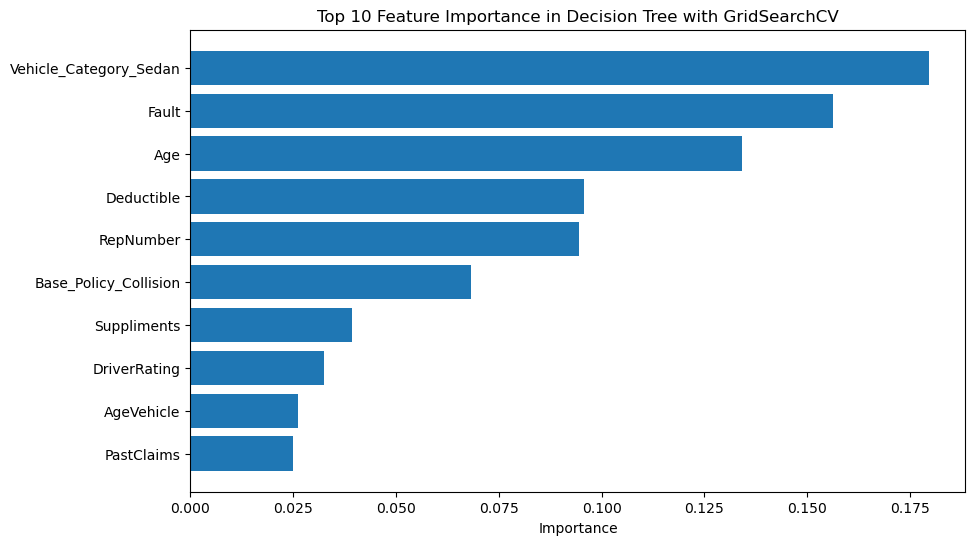

In [27]:
# Step 5: Plot feature importance
feature_importance = dt_model.feature_importances_
feature_names = list(X_train.columns)

# Create a DataFrame with feature names and their importance scores
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importance})

# Sort the DataFrame by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=True)

# Plot the top N important features
top_n = 10  
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'].tail(top_n), feature_importance_df['Importance'].tail(top_n))
plt.xlabel('Importance')
plt.title('Top {} Feature Importance in Decision Tree with GridSearchCV'.format(top_n))
plt.show()

* To see if we can enhance the previous model, we will be using random forest and bagging method applied next:

##### Random Forests and Bagging Method:

We will be training a random forest model and apply cross-validation as well and plot the confusion matrix and print our evaluation metrics, too. Later, in the next subsection, we will apply bagging.

In [28]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_validate
from statistics import mean

# Apply Bagging and Random Forests   
bag = RandomForestClassifier(random_state=123, class_weight='balanced', n_jobs=-1)

# Define the hyperparameters:
parameters = {
    'max_depth': [10, 20, 30, 50, 60, 70],
    'n_estimators': [30, 50, 100, 200, 300, 400],
    'ccp_alpha': [0.00001, 0.0001, 0.001, 0.01, 0.1]
}
# Apply Grid Search on Random Forests
grid_search_bag = GridSearchCV(bag, parameters, cv=5, n_jobs=-1, verbose=1)
model_bag = grid_search_bag.fit(X_train_scaled, y_train)

# printing the best score and params:
print(f"Best score: {model_bag.best_score_}")
print(f"Best parameters: {model_bag.best_params_}")

Fitting 5 folds for each of 180 candidates, totalling 900 fits
Best score: 0.9408998783948114
Best parameters: {'ccp_alpha': 0.0001, 'max_depth': 50, 'n_estimators': 50}


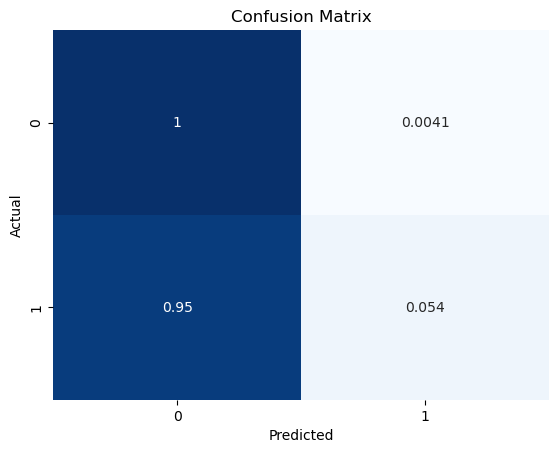

Classification Report:
               precision    recall  f1-score   support

           0       0.94      1.00      0.97      2899
           1       0.45      0.05      0.10       185

    accuracy                           0.94      3084
   macro avg       0.70      0.52      0.53      3084
weighted avg       0.91      0.94      0.92      3084

ROC AUC Score: 0.7961869423752832


In [30]:
# fit the best model using the best params on scaled data
bag_model = RandomForestClassifier(max_depth = 50, max_features = 53, n_estimators = 50, ccp_alpha = 0.0001, random_state = 123) 
bag = bag_model.fit(X_train_scaled, y_train)

# Evaluate the model
y_pred_bag = bag.predict(X_test_scaled)
y_prob_bag = bag.predict_proba(X_test_scaled)[:, 1]

# Confusion Matrix
conf_matrix_bag = confusion_matrix(y_test, y_pred_bag)
cm_normalized_bag = conf_matrix_bag.astype('float') / conf_matrix_bag.sum(axis=1)[:, np.newaxis]
sns.heatmap(cm_normalized_bag, annot=True, cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Print the classification report and ROC AUC score
class_report_bag = classification_report(y_test, y_pred_bag)
roc_auc_bag = roc_auc_score(y_test, y_prob_bag)

print("Classification Report:\n", class_report_bag)
print("ROC AUC Score:", roc_auc_bag)

<Figure size 600x400 with 0 Axes>

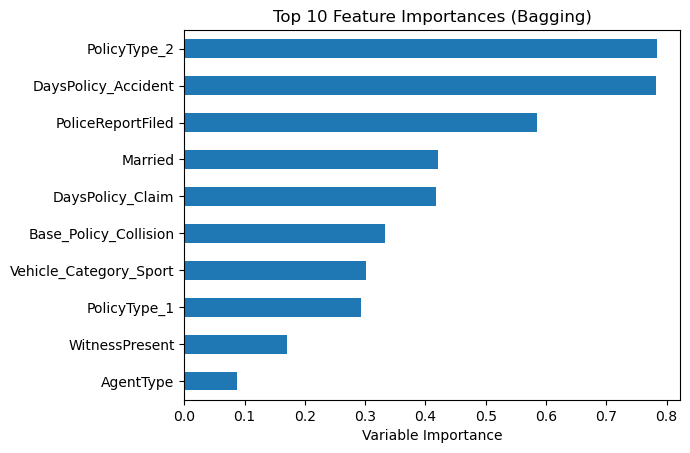

In [32]:
feature_importance = bag.feature_importances_
feature_names = list(X_train.columns)

# Get feature importance of bagging/random forest
Importance = pd.DataFrame({'Importance':bag.feature_importances_ * 100}, 
                          index = X_train.columns)
# Select top 10
top_10_importances = Importance.sort_values(by = 'Importance', axis = 0, ascending = True).head(10)

# Plot feature importance of bagging method
plt.figure(figsize=(6, 4)) 
top_10_importances.plot(kind = 'barh')
plt.title("Top 10 Feature Importances (Bagging)")
plt.xlabel('Variable Importance')
plt.gca().legend_ = None

The best model train using a decision tree is very much similar to the best model trained using the log reg method. For the next steps, we will be going back to our feature engineering step to see if we can train a better model by making some revised decisions about the preprocessing anf feature wngineering steps. (Next Sprint)

### Section 4: Conclusion and Insights

We fit two best logreg and dt models that somewhat behave the same is terms on ROC AUC and Percision and Recall measures. For the next steps, we will be rethinking the feature engineering step, with a focus on including accident and insurrance claim date info. We will also be checking which predictors have undesireable p_values and what is the effect of training a logreg and a dt model in absence of those low contributors.